In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


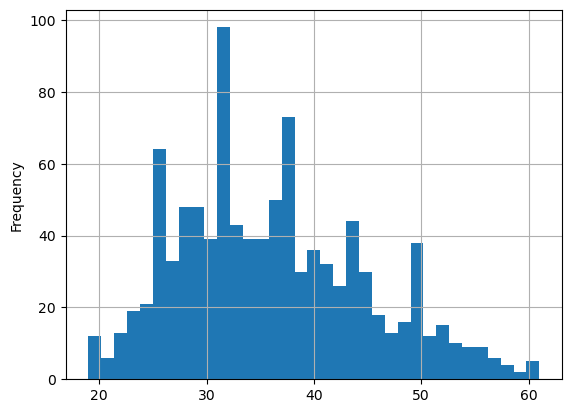

In [5]:
import matplotlib.pyplot as plt
df['Age'].plot(kind='hist',bins=35)
plt.grid()

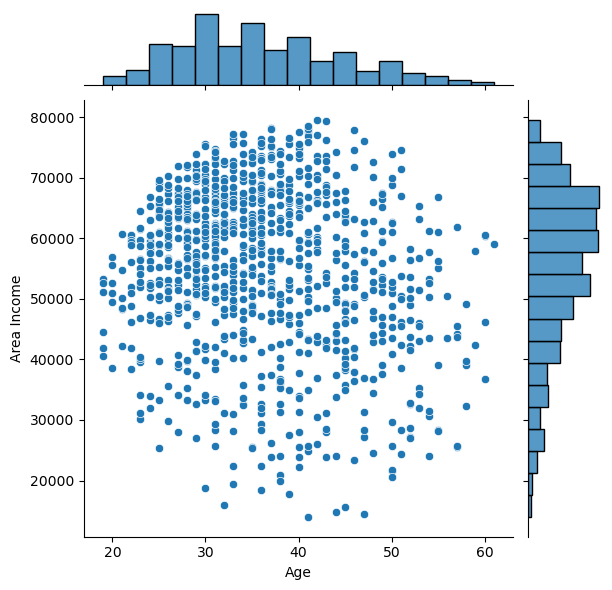

In [6]:
import seaborn as sns
sns.jointplot(x='Age',y='Area Income',data=df)

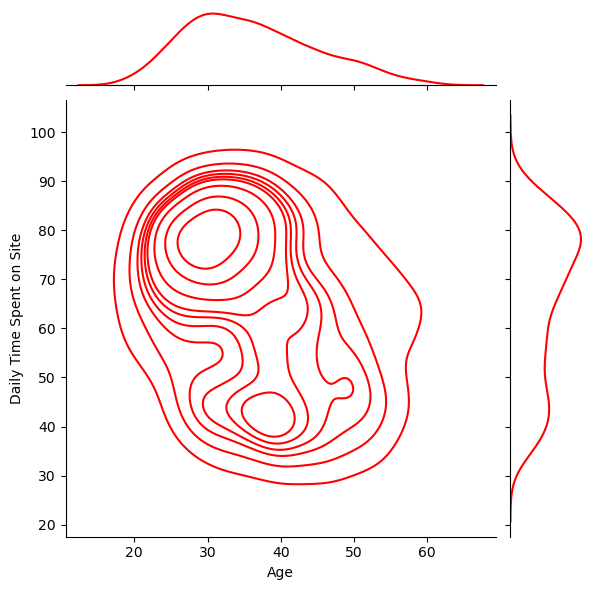

In [7]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,kind='kde',color='red')

In [10]:
#sns.pairplot(data=df,hue='Clicked on Ad')

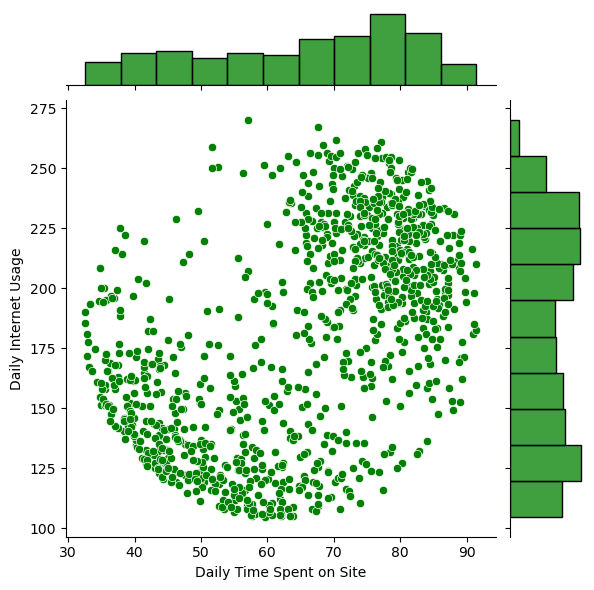

In [8]:
sns.jointplot(y='Daily Internet Usage',x='Daily Time Spent on Site',data=df,color='green')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
req_col=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
X=df[req_col]
y=df.iloc[:,9]
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.4,random_state=101)


In [28]:
model.fit(train_X,train_Y)
pred_Y=model.predict(test_X)

/Users/dravinl/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


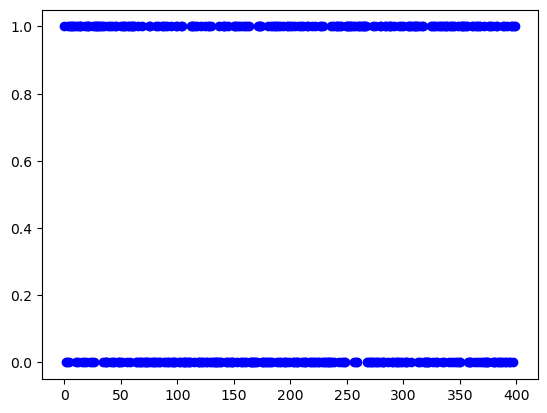

In [33]:
plt.scatter(range(len(pred_Y)),pred_Y,color='blue')

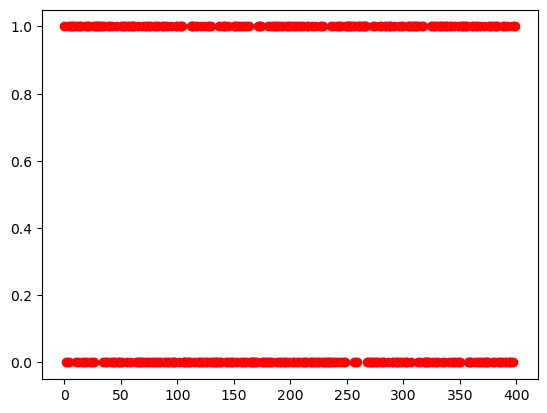

In [34]:
plt.scatter(range(len(test_Y)),test_Y,color='red')

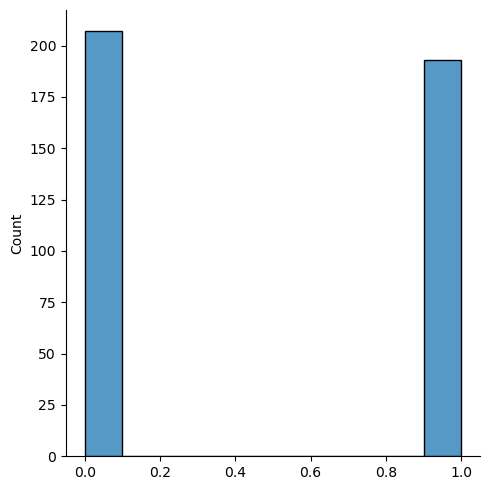

In [36]:
sns.displot(pred_Y)

In [29]:
from sklearn.metrics import classification_report
classification_report(test_Y,pred_Y)

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97       206\n           1       0.97      0.97      0.97       194\n\n    accuracy                           0.97       400\n   macro avg       0.97      0.97      0.97       400\nweighted avg       0.97      0.97      0.97       400\n'